In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape) # 샘플수 1797, 변수 64개 (8x8 픽셀)

digits.data[0]

(1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

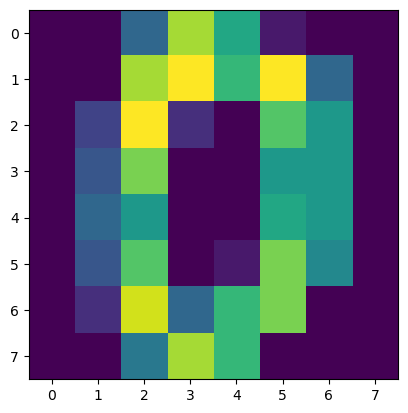

In [3]:
import matplotlib.pyplot as plt
plt.imshow(digits.data[0].reshape(8,8))

In [4]:
#초기 좌표: k-means++
from sklearn.cluster import KMeans
model = KMeans(init='k-means++', n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_
print(model.cluster_centers_) # 중심좌표

[[ 0.00000000e+00  1.66533454e-16  3.07228916e-01  7.16265060e+00
   1.19457831e+01  1.93373494e+00  1.50602410e-01  5.42168675e-02
   2.60208521e-18  1.20481928e-02  3.28313253e+00  1.37951807e+01
   8.46385542e+00  1.53012048e+00  9.75903614e-01  2.77108434e-01
   1.30104261e-18  6.44578313e-01  1.07108434e+01  1.15602410e+01
   4.33734940e+00  5.25903614e+00  3.87349398e+00  3.25301205e-01
   6.02409639e-03  4.75903614e+00  1.47590361e+01  5.86144578e+00
   6.87951807e+00  1.07530120e+01  6.21686747e+00  1.80722892e-02
   0.00000000e+00  8.92771084e+00  1.48072289e+01  9.35542169e+00
   1.28132530e+01  1.43915663e+01  5.48192771e+00  0.00000000e+00
   9.63855422e-02  6.50602410e+00  1.16867470e+01  1.23433735e+01
   1.48373494e+01  1.07590361e+01  1.56626506e+00  1.04083409e-17
   6.02409639e-02  1.11445783e+00  3.00000000e+00  7.77710843e+00
   1.40843373e+01  4.13253012e+00  1.80722892e-02 -8.32667268e-17
   1.08420217e-19  2.40963855e-02  3.73493976e-01  7.96385542e+00
   1.23253

In [5]:
#그래프 그리는 함수 생성
def show_digits(images, labels):
    f = plt.figure(figsize=(8,2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([]) # 눈금 제거 옵션
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

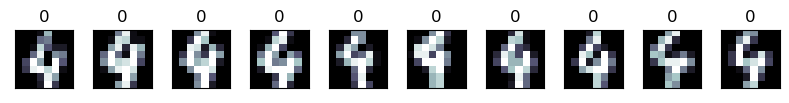

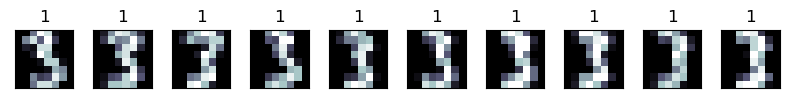

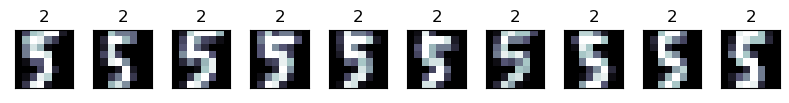

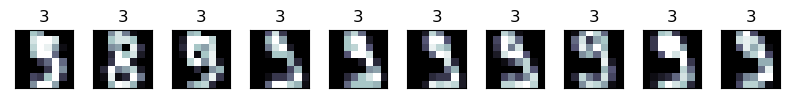

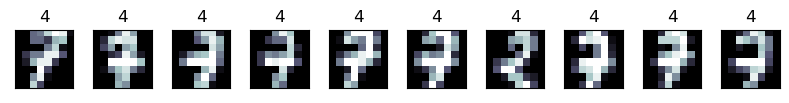

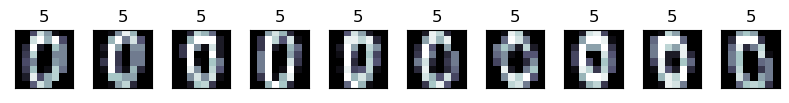

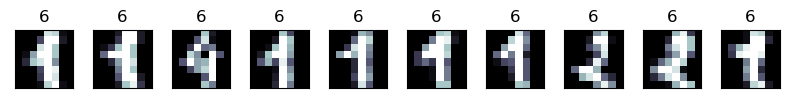

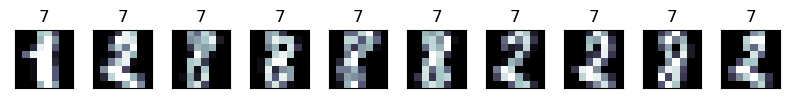

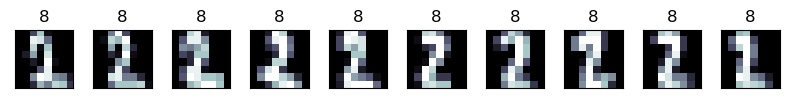

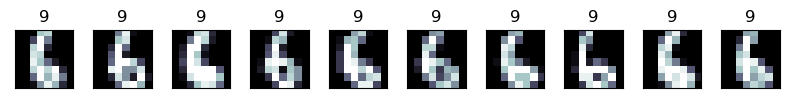

In [6]:
for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [7]:
#오분류표
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,   1,   0,   0,   0,  55,  99,  24,   2],
       [  0,  13,   0,   2,   3,   1,   2,   8, 148,   0],
       [  0, 154,   2,  13,   7,   0,   0,   7,   0,   0],
       [163,   0,   0,   0,   7,   0,   7,   4,   0,   0],
       [  2,   0, 136,  43,   0,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   1,   1,   2,   0, 177],
       [  0,   0,   0,   0, 177,   0,   0,   2,   0,   0],
       [  0,   2,   4,  53,   5,   0,   5, 100,   3,   2],
       [  0,   6,   6, 139,   7,   0,  20,   2,   0,   0]], dtype=int64)

In [8]:
#실루엣 계수 확인
from sklearn.metrics.cluster import silhouette_score
silhouette_score(digits.data, y_pred)

0.18251916424600556

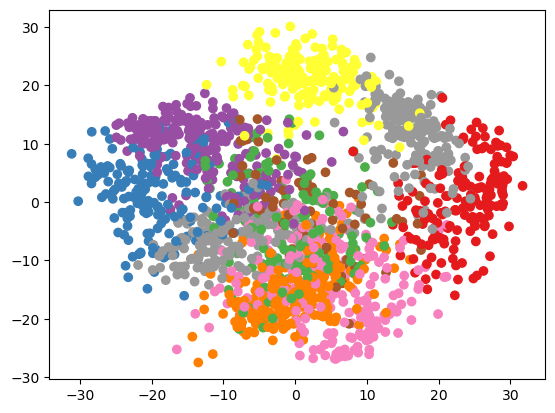

In [9]:
#군집화 결과를 주성분 분석을 통해 그린 그래프
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

In [10]:
#초기 좌표: random
from sklearn.cluster import KMeans
model = KMeans(init='random', n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_
print(model.cluster_centers_) # 중심좌표

[[ 0.00000000e+00  5.96590909e-01  8.71590909e+00  1.46306818e+01
   1.40454545e+01  7.00568182e+00  5.45454545e-01  2.77555756e-17
   1.13636364e-02  4.20454545e+00  1.26022727e+01  9.07386364e+00
   1.12386364e+01  1.19602273e+01  1.84659091e+00  1.13636364e-02
   5.68181818e-03  1.85795455e+00  3.53977273e+00  3.47159091e+00
   1.17897727e+01  9.92613636e+00  8.57954545e-01  6.93889390e-18
   0.00000000e+00  3.97727273e-02  9.09090909e-01  8.30681818e+00
   1.38295455e+01  6.76704545e+00  3.06818182e-01  0.00000000e+00
   0.00000000e+00  6.25000000e-02  6.81818182e-01  4.60227273e+00
   1.17613636e+01  1.23125000e+01  2.32954545e+00  0.00000000e+00
   0.00000000e+00  4.54545455e-01  1.44318182e+00  6.93181818e-01
   4.17613636e+00  1.23693182e+01  6.36363636e+00  5.68181818e-03
   3.46944695e-18  9.26136364e-01  7.28409091e+00  6.59090909e+00
   8.59659091e+00  1.37215909e+01  6.09090909e+00  1.76136364e-01
   0.00000000e+00  4.77272727e-01  9.52840909e+00  1.49829545e+01
   1.41420

In [11]:
#그래프 그리는 함수 생성
def show_digits(images, labels):
    f = plt.figure(figsize=(8,2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([]) # 눈금 제거 옵션
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)

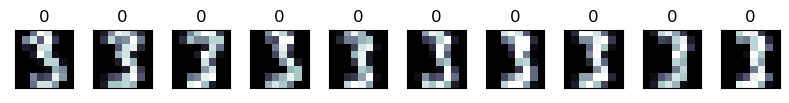

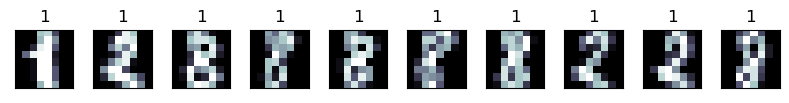

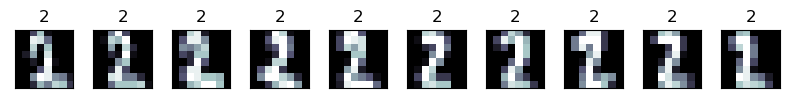

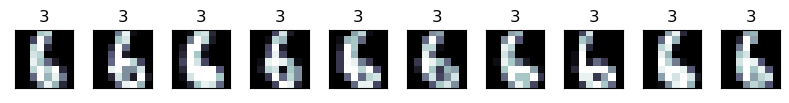

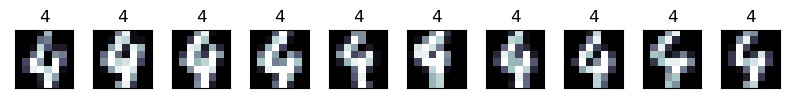

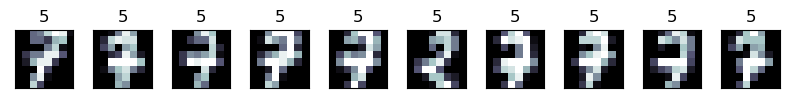

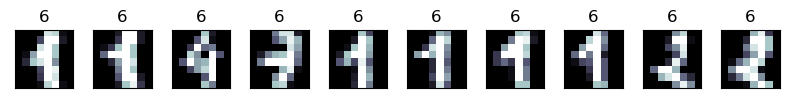

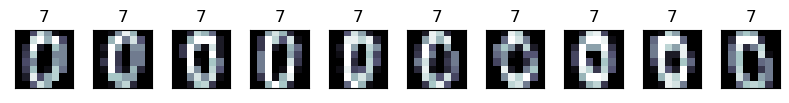

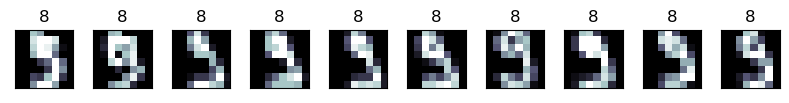

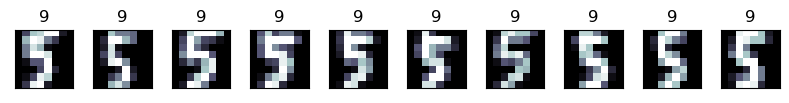

In [12]:
for i in range(10):
    show_cluster(digits.images, y_pred, i)

In [13]:
#오분류표
from sklearn.metrics import confusion_matrix
confusion_matrix(digits.target, y_pred)

array([[  0,   0,   0,   0,   1,   0,   0, 177,   0,   0],
       [  1,  99,  24,   2,   0,   0,  55,   0,   0,   1],
       [ 13,   8, 148,   0,   0,   3,   2,   1,   2,   0],
       [154,   7,   0,   0,   0,   7,   0,   0,  13,   2],
       [  0,   3,   0,   0, 162,   9,   7,   0,   0,   0],
       [  0,   0,   0,   1,   2,   0,   0,   0,  43, 136],
       [  0,   2,   0, 177,   0,   0,   1,   1,   0,   0],
       [  0,   2,   0,   0,   0, 175,   2,   0,   0,   0],
       [  2, 101,   3,   2,   0,   5,   6,   0,  51,   4],
       [  6,   2,   0,   0,   0,   7,  20,   0, 139,   6]], dtype=int64)

In [14]:
#실루엣 계수 확인
from sklearn.metrics.cluster import silhouette_score
silhouette_score(digits.data, y_pred)

0.18234702749956433

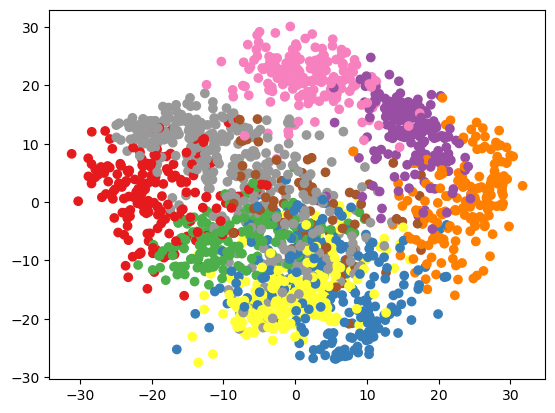

In [15]:
#군집화 결과를 주성분 분석을 통해 그린 그래프
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()